# Summary analysis of evaluation output.

The purpose of this notebook is to describe the results; specifically, the evaluation statistics.

## Executive summary.
I make the following two conclusions from this work package:

1. It is highly unlikely that any given patient that presents to a general practice will have complex mental health difficulties.

    \[Evidenced by the low prevalence of patients satisfying our definition of complex mental health difficulties.\]
2. The likelihood that a patient has complex mental health difficulties increases with every diagnosis of a psychological disorder on their record.

    \[Evidenced by the informativeness of the count of recorded psychological disorders.\]
3. The likelihood that a patient has complex mental health difficulties is very low if the patient has no antipsychotic prescriptions and only satisfies a few Concurrent features.

    \[Evidenced by the informativeness of the tightly-knit cluster of high-scoring feature sets.\]


### Load requirements.

In [19]:
350000 /len(eval_output)

0.8608286090239433

In [5]:
%run 'UNSEEN_helper_functions.ipynb'
%store -r

 
Before describing the evaluation output, let me remind the reader of our aim and the constraints of our context.


## The story so far
The aim of this investigation has been to identify features within patients’ primary-care electronic healthcare records
that are associated with our provisional definition of complex mental health difficulties. In `UNSEEN_create_caseness_variales.ipynb`,
I show that the caseness of complex mental health difficulties can be known with considerable certainty, in this dataset. We know this
because the entropy of our caseness variable is $14.0\%$ of its theoretical maximum, i.e. it is only
$14.0\%$ as uncertain / surprising / unforeseeable as it could possibly be. Conversely, this means
the caseness of a given patient is $86.0\%$ as certain / unsurprising / foreseeable as it could possibly be.
In fact, we could correctly classify $98.0\%$ of patients in this our dataset if we simply assumed that no one has complex
mental health difficulties. Thus, I knew from an early stage that it would be difficult for any feature set to improve the indicative
performance of simply assuming the patient did not have complex mental health difficulties.

<br/>
<br/>

## The findings
### _The distribution of feature sets across the range of scaled mutual information observed._

The vast majority of feature sets score very low for scaled mutual information, which means they do little to improve our certainty about
whether a patient demonstrates the caseness of complex mental health difficulties. To illustrate this point, below I show the count of feature
sets in each percentage-point interval of scaled mutual information that I observed.

The counts on the vertical axis are presented in $log_{10}$ because the counts are orders of magnitudes greater for each percent point drop
in scaled mutual  (i.e. as you move leftward in the plot). This is visualised by a straight line fit through the log counts. For example, the
data point in the top left tells us that about $10^{5.5} = 350,000$ feature sets show a scaled mutual information <1%; this is $86$% of all
feature sets. On the other hand, the outlier in the bottom right represents the single feature set that showed a >11% scaled mutual information: the
count of psychological disorders.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


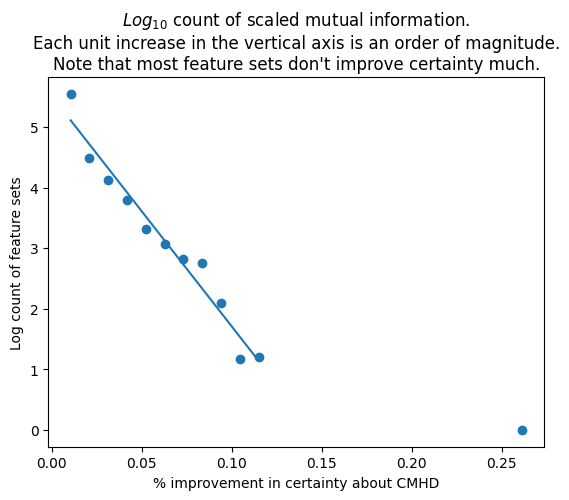

In [22]:
display(
    Markdown(
f""" 
Before describing the evaluation output, let me remind the reader of our aim and the constraints of our context.


## The story so far
The aim of this investigation has been to identify features within patients’ primary-care electronic healthcare records
that are associated with our provisional definition of complex mental health difficulties. In `UNSEEN_create_caseness_variales.ipynb`,
I show that the caseness of complex mental health difficulties can be known with considerable certainty, in this dataset. We know this
because the entropy of our caseness variable is ${round(entropy_caseness_scaled, 1)}\%$ of its theoretical maximum, i.e. it is only
${round(entropy_caseness_scaled, 1)}\%$ as uncertain / surprising / unforeseeable as it could possibly be. Conversely, this means
the caseness of a given patient is ${100-round(entropy_caseness_scaled, 1)}\%$ as certain / unsurprising / foreseeable as it could possibly be.
In fact, we could correctly classify ${round(hitRate_none, 1)}\%$ of patients in this our dataset if we simply assumed that no one has complex
mental health difficulties. Thus, I knew from an early stage that it would be difficult for any feature set to improve the indicative
performance of simply assuming the patient did not have complex mental health difficulties.

<br/>
<br/>

## The findings
### _The distribution of feature sets across the range of scaled mutual information observed._

The vast majority of feature sets score very low for scaled mutual information, which means they do little to improve our certainty about
whether a patient demonstrates the caseness of complex mental health difficulties. To illustrate this point, below I show the count of feature
sets in each percentage-point interval of scaled mutual information that I observed.

The counts on the vertical axis are presented in $log_{{10}}$ because the counts are orders of magnitudes greater for each percent point drop
in scaled mutual  (i.e. as you move leftward in the plot). This is visualised by a straight line fit through the log counts. For example, the
data point in the top left tells us that about $10^{{5.5}} = 350,000$ feature sets show a scaled mutual information <1%; this is $86$% of all
feature sets. On the other hand, the outlier in the bottom right represents the single feature set that showed a >11% scaled mutual information: the
count of psychological disorders.
"""
    )
)
# Get counts of feature sets in intervals of scaled mutual information that
# approximate one percentage point.
counts, edges = numpy.histogram(eval_output.Scaled_mutual_information, bins = 25)
# Log the counts because we will be showing a log plot.
log_counts = numpy.log10(counts)
log_counts[numpy.isinf(log_counts)] = numpy.nan
# Fit line of best fit to the non-zero log counts.
nonZero_x = edges[1:12]
nonZero_y = log_counts[0:11]
m, b = numpy.polyfit(nonZero_x, nonZero_y, 1)
pred_y = m*nonZero_x + b
# Plot
matplotlib.pyplot.scatter(edges[1:], log_counts)
matplotlib.pyplot.plot(nonZero_x, pred_y)
matplotlib.pyplot.title('$Log_{10}$ count of scaled mutual information.\nEach unit increase in the vertical axis is an order of magnitude.\nNote that most feature sets don\'t improve certainty much.')
matplotlib.pyplot.xlabel('% improvement in certainty about CMHD')
matplotlib.pyplot.ylabel('Log count of feature sets')
matplotlib.pyplot.show()


### _The best-performing feature set: the count of psychological disorders._

The best-performing feature set is the count of psychological disorders, which has a scaled mutual information of
$26.0$%. This means that by knowing these feature sets, the caseness
of a patient is now $89.7$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously 
$86.0$%.

<br/>

As a count variable, the odds ratio is the only evaluation statistics available. Its odds ratio of
$2.26$ means that, in the context of all unmeasured confounding and bias, we expect
the odds of satisfying our definition for complex mental health difficulties to be, on average,
$2.26$-times greater for patient groups that have an additional psychological disorder
on their record. In other words, __patient groups with one additional psychological disorder recorded had a
$69.0$% probability of satisfying our
definition for complex mental health difficulties.__ Yet another interpretation of the odds ratio is to see
it as the ratio of correctly classified to incorrectly classified observations. So, on average, simply knowing
that one of our patient groups had an additional diagnosis of a psychological disorder on recorded meant we
correctly classified twice as many patients as we incorrectly classify. One should be cautious with this
relativistic interpretation because twice a small number is still a small number.

I also note that the modal count of recorded psychological disorders in our study population is
$1.0$, and the distribution follows a slightly overdispersed Poisson distribution
(mean:variance ratio of $1.18>1$).
So, my previous interpretations of the odds ratio is strongly biased to saying that we expect the odds of
satisfying our definition for complex mental health difficulties to be, on average, $2.26$-times
greater for patient groups that have two rather than one psychological disorders on their record.


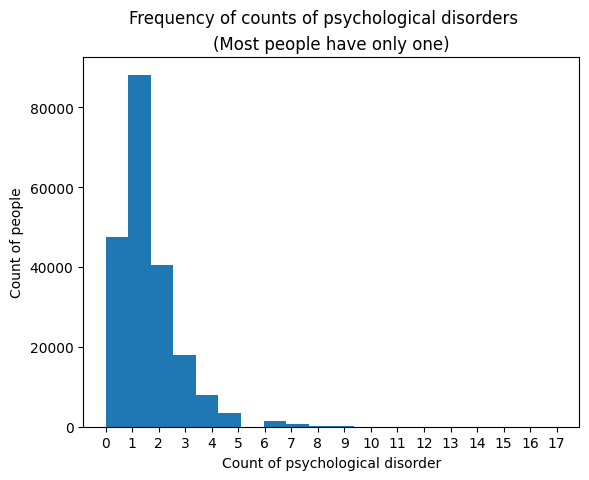

In [25]:
display(
    Markdown(
f"""
### _The best-performing feature set: the count of psychological disorders._

The best-performing feature set is the count of psychological disorders, which has a scaled mutual information of
${round(eval_output.Scaled_mutual_information[0],2) * 100}$%. This means that by knowing these feature sets, the caseness
of a patient is now ${round(100 - (entropy_caseness_scaled * (1 - (eval_output.Scaled_mutual_information[0] ))), 1)}$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously 
${round(100 - entropy_caseness_scaled, 2)}$%.

<br/>

As a count variable, the odds ratio is the only evaluation statistics available. Its odds ratio of
${eval_output.Odds_ratio[0]}$ means that, in the context of all unmeasured confounding and bias, we expect
the odds of satisfying our definition for complex mental health difficulties to be, on average,
${eval_output.Odds_ratio[0]}$-times greater for patient groups that have an additional psychological disorder
on their record. In other words, __patient groups with one additional psychological disorder recorded had a
${round(eval_output.Odds_ratio[0]/ (eval_output.Odds_ratio[0] + 1) * 100, 0)}$% probability of satisfying our
definition for complex mental health difficulties.__ Yet another interpretation of the odds ratio is to see
it as the ratio of correctly classified to incorrectly classified observations. So, on average, simply knowing
that one of our patient groups had an additional diagnosis of a psychological disorder on recorded meant we
correctly classified twice as many patients as we incorrectly classify. One should be cautious with this
relativistic interpretation because twice a small number is still a small number.

I also note that the modal count of recorded psychological disorders in our study population is
${eval_output.Mode[0]}$, and the distribution follows a slightly overdispersed Poisson distribution
(mean:variance ratio of ${round(numpy.var(feature_set_array.countPsychologicalDisorders) / numpy.mean(feature_set_array.countPsychologicalDisorders), 2)}>1$).
So, my previous interpretations of the odds ratio is strongly biased to saying that we expect the odds of
satisfying our definition for complex mental health difficulties to be, on average, ${eval_output.Odds_ratio[0]}$-times
greater for patient groups that have two rather than one psychological disorders on their record.
"""
    )
)

# Plot distribution of recorded counts of psychological disorders.
matplotlib.pyplot.hist(feature_set_array.countPsychologicalDisorders, bins = 20)
matplotlib.pyplot.suptitle('Frequency of counts of psychological disorders')
matplotlib.pyplot.title('(Most people have only one)')
matplotlib.pyplot.xlabel('Count of psychological disorder')
matplotlib.pyplot.ylabel('Count of people')
matplotlib.pyplot.xticks(numpy.arange(18))
matplotlib.pyplot.show()


### _The set of second-best feature sets: those with >10% scaled mutual information._

Beyond the best-performing feature set, there is a small, distinct set of feature sets that score better than the next
block of feature sets. These are highlighted by the circle in the plot, below.
<br/>


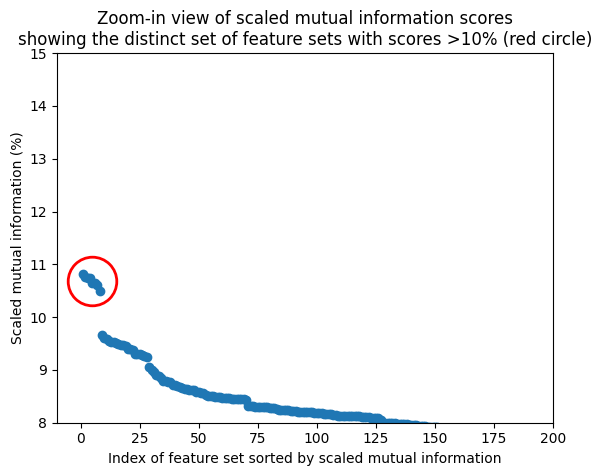


In `UNSEEN_cluster_study.ipynb`, I demonstrate that this distinct cluster of 16 feature sets are similar within
their cluster and dissimilar from other, lower-scoring clusters of feature sets. Below, I show a table of the
statistics summarising the distribution of evaluation statistics for this high-scoring cluster. Positive
predictive value is not reported because it was <0.01 for all of the feature sets.
<br/>


,Arithmetic mean,Median,1st quartile,3rd quartile,Maximum,Minimum
Scaled_mutual_information,10.7,10.7,10.6,10.7,10.8,10.5
Prevalence_per_thousand,796.7,796.2,740.0,853.0,856.1,738.3
Class_balanced_accuracy,0.1,0.1,0.1,0.1,0.1,0.1
Odds_ratio,0.1,0.1,0.1,0.1,0.1,0.1
npv,0.9,0.9,0.9,0.9,0.9,0.9
tn,39564.1,39662.0,28187.2,51020.5,51368.0,27560.0
fn,2723.2,2727.0,2391.2,3055.0,3066.0,2373.0
fp,164347.9,164250.0,152891.5,175724.8,176352.0,152544.0
tp,1372.8,1369.0,1041.0,1704.8,1723.0,1030.0



I note that the distribution of all evaluation statistics are narrow, indicating that all of feature sets in this
high-scoring cluster perform equally well, pragmatically speaking. Therefore, I consider it sufficient to use the
cluster's median values for the evaluation statistics when discussing all the feature sets.

<br/>

A scaled mutual information of $10.7$% indicates that our initial certainty
about whether a given patient satisfies our definition of complex mental health difficulties is improved by
$10.7$%. This means that by knowing these feature sets, the caseness
of a patient is now $87.5$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously
$86.0$%.

<br/>

The prevalence per thousand is $796.7$, which constrasts with the caseness
prevalence of $2.0$ per thousand. This hints that these features are anti-indicators
in the sense that they are useful indicators of _not_ having complex mental health difficulties.

<br/>

The class balanced accuracy is far from 1.0 at $0.1$. This suggests that
these feature sets are not good at indicating caseness of complex mental health difficulties.

<br/>

The odds ratio of $0.1$ means that, in the context of all unmeasured
confounding and bias, we expect the odds of satisfying our definition for complex mental health difficulties to be,
on average, $0.1$-times the odds for patient groups that satisfy these
feature sets' definitions. In other words, patient groups that satisfy these feature sets' definitions have a
$10.0$% probability of
satisfying our definition for complex mental health difficulties. To be clear, this is further evidence that these
feature sets are useful indicators of _not_ having complex mental health difficulties, rather than being useful
indicators of _having_ complex mental health difficulties. Our third interpretation of the odds ratio is to see
it as the ratio of correctly classified to incorrectly classified observations. An odds ratio of
$0.1$ corresponds to $^1/_{10}$, which means that, on average,
satisfying these feature sets' definitions means we _incorrectly_ classify ten-times as many patients as we correctly classify.

<br/>

The negative predictive value of $0.9$ is unsurprising given how few
patients satisfied our definition of complex mental health difficulties. It indicates the proportion of patients who do
not satisfy the definition of the feature sets out of all those who do not satisfy the caseness of complex mental health
difficulties. The conversely-low positive predictive value of <0.01 is also a consequence of low caseness in the study
population. It indicates the proportion of patients satisfying the definition of the feature set out of all those who do
satisfy the caseness of complex mental health difficulties. In summary, in the very small portion of patients that satisfy
the caseness of complex mental health difficulties, very few also satisfy these feature sets; and in the very large
portion of patients that do not satisfy the caseness of complex mental health difficulties, the vast majority do not
satisfy these feature sets either.
<br/>


In [37]:
display(
    Markdown(
f"""
### _The set of second-best feature sets: those with >10% scaled mutual information._

Beyond the best-performing feature set, there is a small, distinct set of feature sets that score better than the next
block of feature sets. These are highlighted by the circle in the plot, below.
<br/>
"""
    )
)

# Plot of scaled mutual information showing set of second-best feature sets.
matplotlib.pyplot.scatter(
    range(
        len(
            set(
                eval_output.Scaled_mutual_information
            )
        )
    )
    ,numpy.sort(
        list(
            set(
                eval_output.Scaled_mutual_information * 100
            )
        )
    )[::-1]
)
matplotlib.pyplot.plot(
    5, numpy.mean(eval_output.Scaled_mutual_information.loc[eval_output.Scaled_mutual_information > .10][1:]) * 100,
    'o', ms = 35, mec = 'red', mfc = 'none', mew = 2)
matplotlib.pyplot.title('Zoom-in view of scaled mutual information scores\nshowing the distinct set of feature sets with scores >10% (red circle)')
matplotlib.pyplot.xlabel('Index of feature set sorted by scaled mutual information')
matplotlib.pyplot.ylabel('Scaled mutual information (%)')
matplotlib.pyplot.xlim(-10,200)
matplotlib.pyplot.ylim(8, 15)
matplotlib.pyplot.show()


display(
    Markdown(
f"""
In `UNSEEN_cluster_study.ipynb`, I demonstrate that this distinct cluster of 16 feature sets are similar within
their cluster and dissimilar from other, lower-scoring clusters of feature sets. Below, I show a table of the
statistics summarising the distribution of evaluation statistics for this high-scoring cluster. Positive
predictive value is not reported because it was <0.01 for all of the feature sets.
<br/>
"""
    )
)
high_scoring_cluster = eval_output.loc[eval_output.Scaled_mutual_information > 0.1][1:]
continuous_stats = \
    high_scoring_cluster.loc[:, ~high_scoring_cluster.columns.isin(['Feature_set', 'Feature_set_short', 'Data_type',
                                                                    'Mean', 'Mode', 'ppv'])].astype('float64')
summary_stats = \
    pandas.concat(
        [continuous_stats.mean(), continuous_stats.median(), continuous_stats.quantile(q = 0.25),
         continuous_stats.quantile(q = 0.75), continuous_stats.max(), continuous_stats.min()]
        ,axis = 1
    )

summary_stats.columns = ['Arithmetic mean', 'Median', '1st quartile', '3rd quartile', 'Maximum', 'Minimum']
summary_stats.iloc[0,:] = summary_stats.iloc[0,:] * 100
display( round(summary_stats, 1) )

display(
    Markdown(
f"""
I note that the distribution of all evaluation statistics are narrow, indicating that all of feature sets in this
high-scoring cluster perform equally well, pragmatically speaking. Therefore, I consider it sufficient to use the
cluster's median values for the evaluation statistics when discussing all the feature sets.

<br/>

A scaled mutual information of ${round(summary_stats['Arithmetic mean'][0], 1)}$% indicates that our initial certainty
about whether a given patient satisfies our definition of complex mental health difficulties is improved by
${round(summary_stats['Arithmetic mean'][0], 1)}$%. This means that by knowing these feature sets, the caseness
of a patient is now ${round(100 - (entropy_caseness_scaled * (1 - (round(summary_stats['Arithmetic mean'][0], 1) / 100))), 1)}$%
as certain / unsurprising / foreseeable as it could possibly be - a minor improvement on what was previously
${round(100 - entropy_caseness_scaled, 2)}$%.

<br/>

The prevalence per thousand is ${round(summary_stats['Arithmetic mean'][1], 1)}$, which constrasts with the caseness
prevalence of ${round(caseness_prevalence * 100, 1)}$ per thousand. This hints that these features are anti-indicators
in the sense that they are useful indicators of _not_ having complex mental health difficulties.

<br/>

The class balanced accuracy is far from 1.0 at ${round(summary_stats['Arithmetic mean'][2], 1)}$. This suggests that
these feature sets are not good at indicating caseness of complex mental health difficulties.

<br/>

The odds ratio of ${round(summary_stats['Arithmetic mean'][3], 1)}$ means that, in the context of all unmeasured
confounding and bias, we expect the odds of satisfying our definition for complex mental health difficulties to be,
on average, ${round(summary_stats['Arithmetic mean'][3], 1)}$-times the odds for patient groups that satisfy these
feature sets' definitions. In other words, patient groups that satisfy these feature sets' definitions have a
${round(summary_stats['Arithmetic mean'][3] / (summary_stats['Arithmetic mean'][3] + 1) * 100, 1)}$% probability of
satisfying our definition for complex mental health difficulties. To be clear, this is further evidence that these
feature sets are useful indicators of _not_ having complex mental health difficulties, rather than being useful
indicators of _having_ complex mental health difficulties. Our third interpretation of the odds ratio is to see
it as the ratio of correctly classified to incorrectly classified observations. An odds ratio of
${round(summary_stats['Arithmetic mean'][3], 1)}$ corresponds to $^1/_{{10}}$, which means that, on average,
satisfying these feature sets' definitions means we _incorrectly_ classify ten-times as many patients as we correctly classify.

<br/>

The negative predictive value of ${round(summary_stats['Arithmetic mean'][4], 1)}$ is unsurprising given how few
patients satisfied our definition of complex mental health difficulties. It indicates the proportion of patients who do
not satisfy the definition of the feature sets out of all those who do not satisfy the caseness of complex mental health
difficulties. The conversely-low positive predictive value of <0.01 is also a consequence of low caseness in the study
population. It indicates the proportion of patients satisfying the definition of the feature set out of all those who do
satisfy the caseness of complex mental health difficulties. In summary, in the very small portion of patients that satisfy
the caseness of complex mental health difficulties, very few also satisfy these feature sets; and in the very large
portion of patients that do not satisfy the caseness of complex mental health difficulties, the vast majority do not
satisfy these feature sets either.
<br/>
"""
)
)

In [38]:
display(
    Markdown(
f"""
### _What are these second-best feature sets?_

Below, I show the names of the feature sets in the tightly-knit cluster of second-best feature sets. The cluster
can be summarised as identifying patients:
- with no antipsychotic prescriptions; _and_
- who satisfy the definitions of only a few Concurrent features.

Feature referring to Service use, Treatment, and Chaotic life / Instability were irrelevant for these feature
sets, and features referring to Antecedents, Patterns of Prescription, Relevant Prescriptions were either irrelevant 
or patients only satisfied a few.
"""
    )
)

pandas.DataFrame(high_scoring_cluster.Feature_set_short)



### _What are these second-best feature sets?_

Below, I show the names of the feature sets in the tightly-knit cluster of second-best feature sets. The cluster
can be summarised as identifying patients:
- with no antipsychotic prescriptions; _and_
- who satisfy the definitions of only a few Concurrent features.

Feature referring to Service use, Treatment, and Chaotic life / Instability were irrelevant for these feature
sets, and features referring to Antecedents, Patterns of Prescription, Relevant Prescriptions were either irrelevant 
or patients only satisfied a few.


,Feature_set_short
1,A2_C2_S1_P2_Y0
2,A2_C2_P2_Y0
3,C2_S1_P2_Y0
4,C2_P2_Y0
5,A2_C2_S1_P2_R2_Y0
6,A2_C2_P2_R2_Y0
7,A2_C2_Y0
8,A2_C2_S1_Y0
9,A2_C2_S1_R2_Y0
10,A2_C2_R2_Y0
